In [348]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path(os.environ['AVES_ROOT'])

DATA_PATH = AVES_ROOT / "data" / "external" / "hito"
PROCESSED_PATH = AVES_ROOT / "data" / "processed"
EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"

In [349]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/home/ksmnt/Universidad/CC5208/aves/notebooks/vis-course/2024-otoño'

In [350]:

ciclovias_2021 = gpd.read_file(DATA_PATH / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( DATA_PATH / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")

In [351]:
ciclovias_2021.head()

,FID,OBJECTID,COMUNA,CICLOVIA_N,Shape_Leng,Recomendad,Singularid,Shape__Length,geometry
0,1,1,CERRILLOS,5,4512.098306,Reprobado,Reprobado,5420.466046,"MULTILINESTRING ((-70.72208 -33.51022, -70.722..."
1,2,2,CERRILLOS,5,1283.491532,Reprobado,Reprobado,1540.548491,"MULTILINESTRING ((-70.69357 -33.48135, -70.693..."
2,3,3,CERRO NAVIA,14,1395.508780,Reprobado,Aprobado,1678.401135,"LINESTRING (-70.73033 -33.42368, -70.73035 -33..."
3,4,4,CERRO NAVIA,106,1042.013708,Aprobado,Aprobado,1247.651643,"LINESTRING (-70.73303 -33.41365, -70.73199 -33..."
4,5,5,CERRO NAVIA,251,1947.337029,Aprobado,Aprobado,2331.621926,"LINESTRING (-70.71743 -33.42189, -70.71671 -33..."


<Axes: >

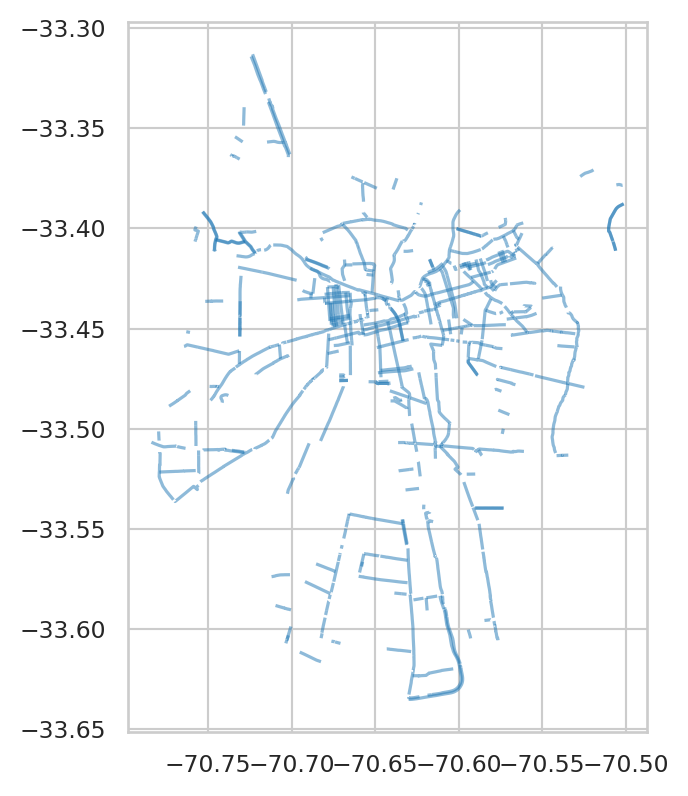

In [352]:
ciclovias_2021.plot(markersize=1, marker='.', alpha=0.5)

In [353]:
df_2021_sin["Gravedad"] = (
    df_2021_sin["Fallecidos"] * 10 + 
     df_2021_sin["Graves"] * 5 + 
      df_2021_sin["Menos_Grav"] * 3 + 
       df_2021_sin["Leves"] * 2 +
        df_2021_sin["Ilesos"] 

)
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry,Gravedad
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742),3
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701),3
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991),3
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606),2
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601),4


Crear los puntos en donde esta la persona

In [354]:
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry,Gravedad
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742),3
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701),3
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991),3
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606),2
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601),4


In [355]:
from aves.features.geo import to_point_geodataframe
df_2021_sin.crs
origenes_viajes = to_point_geodataframe(
    df_2021_sin, "POINT_X", "POINT_Y", crs="epsg:4326"
)



<Axes: >

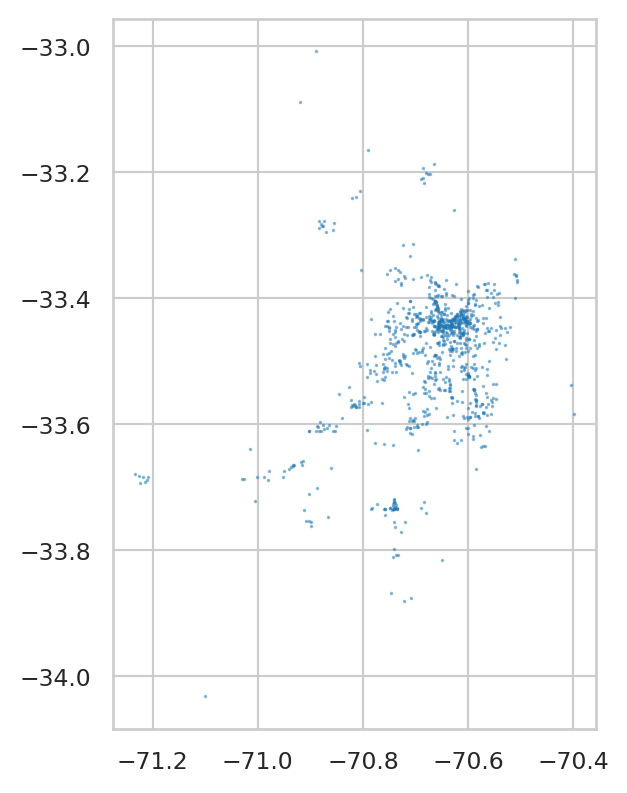

In [356]:
origenes_viajes.plot(markersize=1, marker='.', alpha=0.5)

In [357]:
origenes_viajes.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'REGION', 'COD_COMUN', 'COMUNA',
       'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'Año',
       'Claseaccid', 'Cód_Regi', 'Cód_Zona', 'Zona', 'Cód_Calle', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'Siniestros', 'geometry',
       'Gravedad'],
      dtype='object')

In [358]:
zones = (
    gpd.read_file(PROCESSED_PATH / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(origenes_viajes.crs)
)
zones.head()


,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

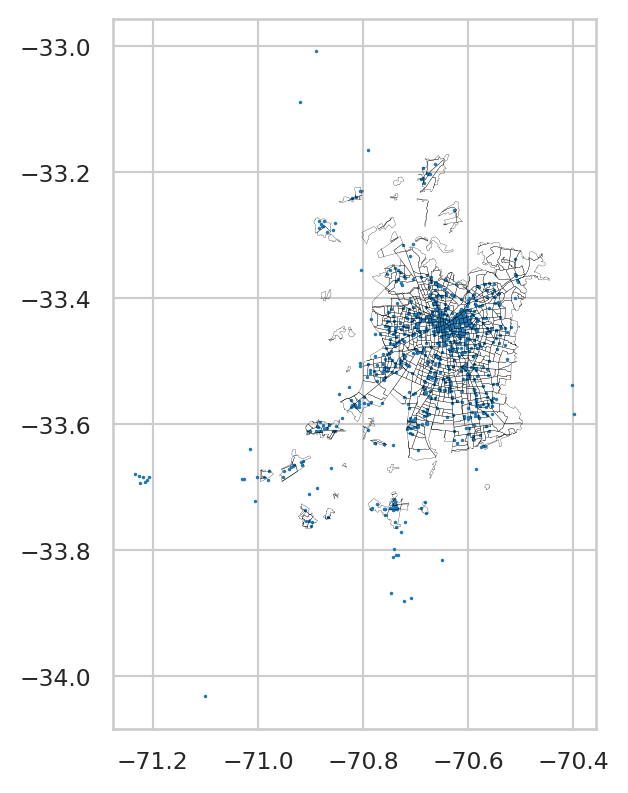

In [359]:
ax = origenes_viajes.plot(marker='.', markersize=1)
zones.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.1)

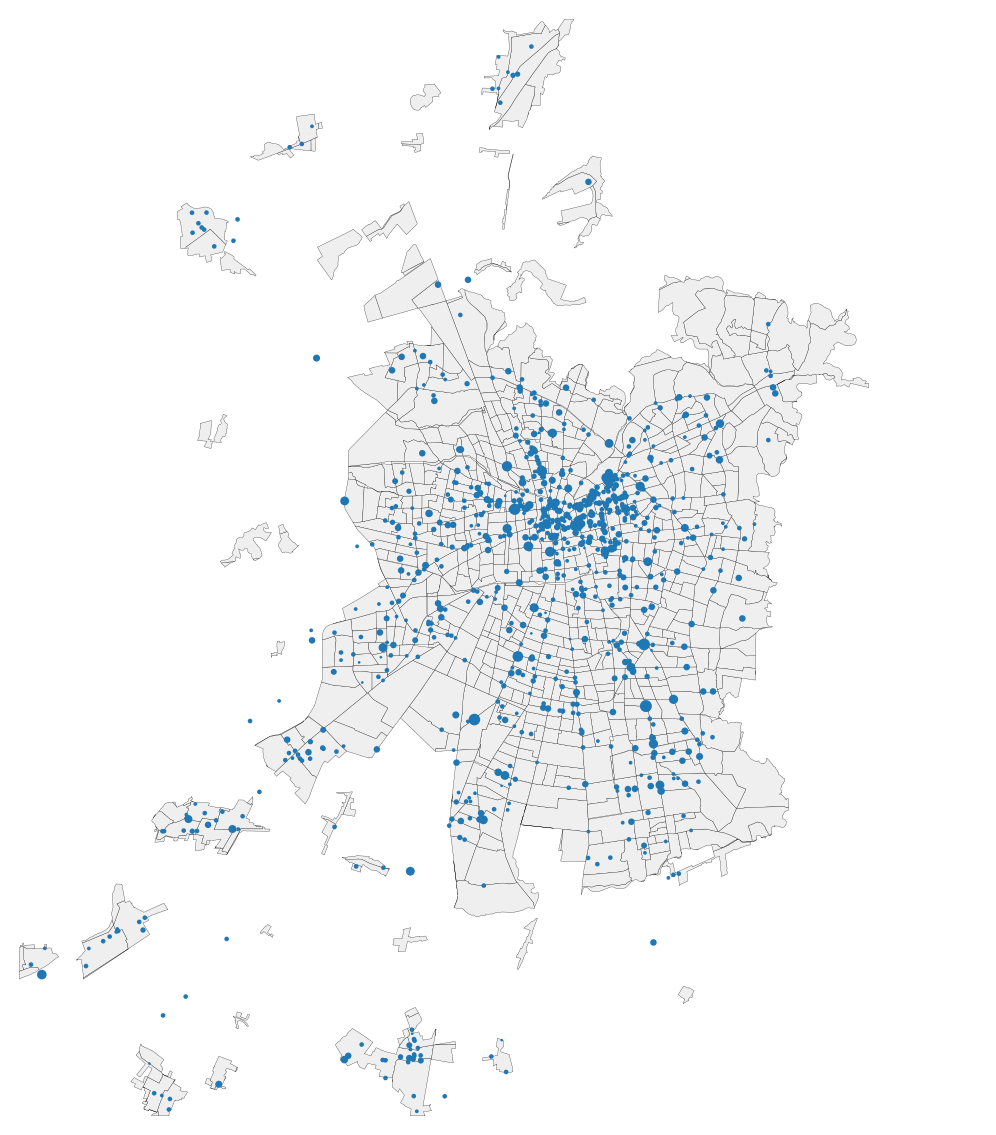

In [360]:
from aves.visualization.figures import GeoFacetGrid
from aves.visualization.maps import bubble_map

grid = GeoFacetGrid(
    # los datos
    origenes_viajes,
    # el contexto geográfico. es opcional, se utiliza para configurar el gráfico
    context=zones,
    # la altura del gráfico
    height=6,
)

# visualizamos el contexto
grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)

# agregamos los bubble_map correspondientes
grid.add_layer(bubble_map, size="Gravedad", scale=1, edgecolor='none')

# agregamos la leyenda
grid.add_legend()

grid.fig.tight_layout()

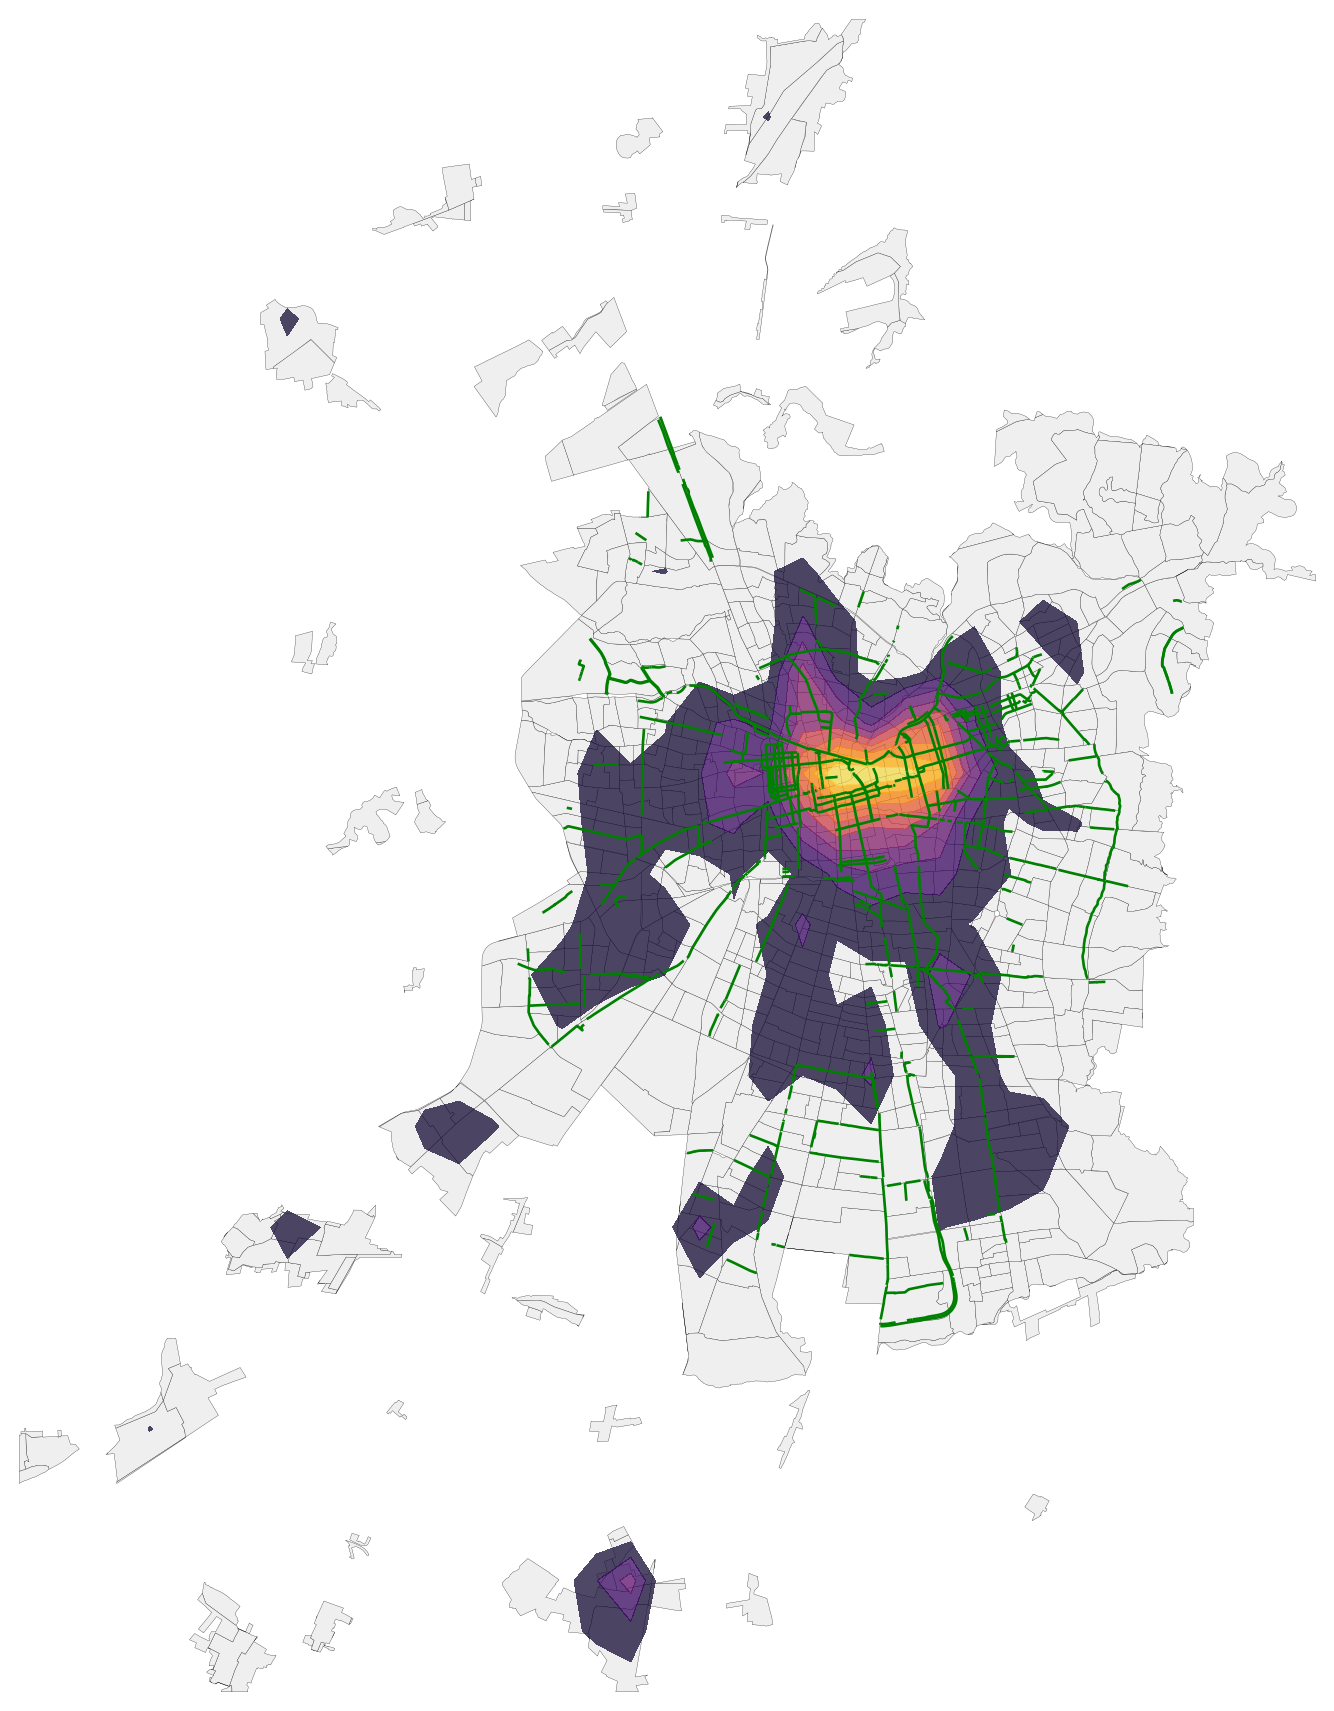

In [361]:
from aves.visualization.maps import heat_map


grid = GeoFacetGrid(
    origenes_viajes,
    context=zones,
    height=9,
)



grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)



grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    # cantidad de niveles/colores del mapa de calor
    n_levels=10,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)

grid.add_layer(ciclovias_2021, edgecolor='green', facecolor='none', linewidth=1)



Se busca los puntos más específicos en donde ocurren los accidentes más graves

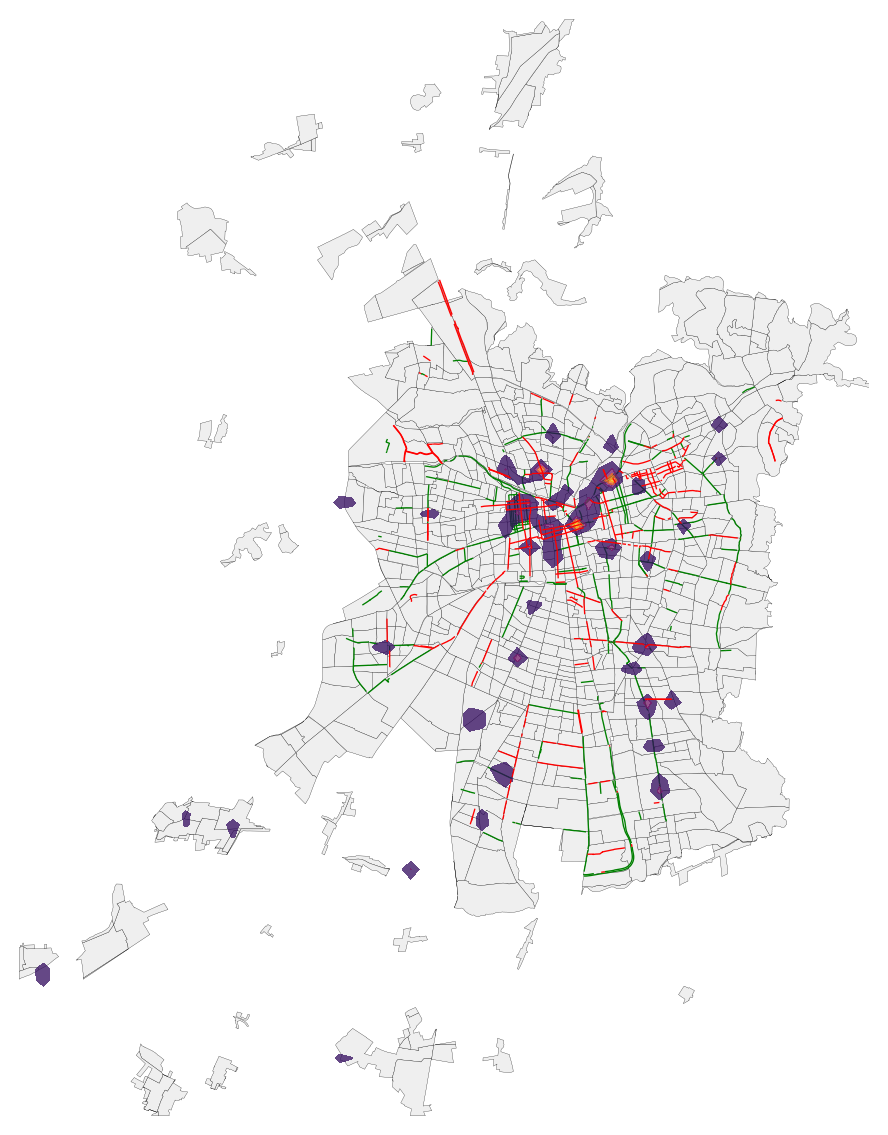

In [362]:
from aves.visualization.maps import heat_map
from aves.visualization.figures import GeoFacetGrid

grid = GeoFacetGrid(
    origenes_viajes[origenes_viajes.Gravedad > 7],
    context=zones,
    height=6,
)

grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)


#estados: Singularid y Recomendad
grid.add_layer(ciclovias_2021[ciclovias_2021["Singularid"] == "Aprobado"] ,edgecolor='green', facecolor='none', linewidth=0.5)
grid.add_layer(ciclovias_2021[ciclovias_2021["Singularid"] == "Reprobado"] ,edgecolor='red', facecolor='none', linewidth=0.5)

grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    weight="Gravedad",
    # cantidad de niveles/colores del mapa de calor
    n_levels=5,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)

Se decide medir como se relaciona la riqueza de una comuna con la calidad de las ciclovías. Primero se limpian las tablas de comunas en la tabla de ciclovías y de hogares.

In [363]:
# hogares are read
hogares = eod.read_homes(EOD_PATH)

# Dictionary of replacements
replacements = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

ciclovias_2021_copy = ciclovias_2021
hogares_copy = hogares

# Function to replace accented characters
def remove_accents(df, column):
    for accented_char, replacement_char in replacements.items():
        df[column] = df[column].str.replace(accented_char, replacement_char)
    return df

# all elements of the column Comuna in ciclovias_2021 have the tldes removed
ciclovias_2021_copy = remove_accents(ciclovias_2021_copy, "COMUNA")

# drop all rows in hogares that have a value of Comuna that is not in ciclovias_2021
hogares_copy = hogares_copy[hogares_copy["Comuna"].isin(ciclovias_2021_copy["COMUNA"])]

# # rename the column COMUNA to Comuna in ciclovias_2021
# ciclovias_2021 = ciclovias_2021.rename(columns={"COMUNA": "Comuna"})


Ahora, se eliminan las columnas que no se utilizarán en ambos dataframes.

In [364]:
# drop the Singularid, FID, OBJECTID, Shape_Leng, SIngularid, Shape__Length columns in ciclovias_2021_copy
ciclovias_2021_copy = ciclovias_2021_copy.drop(columns=["Singularid", "FID", "OBJECTID", "Shape_Leng", "Shape__Length"])

# drop the Sector, DirCoordX, DirCoordY, Fecha, DiaAsig, TipoDia, Temporada, NumVeh, NumBicAdulto, NumBicNino, Propiedad, MontoDiv, ImputadoDiv, MontoArr, ImputadoArr collum in hogares_copy
hogares_copy = hogares_copy.drop(columns=["Sector", "DirCoordX", "DirCoordY", "Fecha", "DiaAsig", "TipoDia", "Temporada", "NumVeh", "NumBicAdulto", "NumBicNino", "Propiedad", "MontoDiv", "ImputadoDiv", "MontoArr", "ImputadoArr"])


,Hogar,Zona,Comuna,NumPer,IngresoHogar,FactorHogar
265,102791,418,MAIPU,2,471343,88.544052
266,102801,418,MAIPU,5,2782253,53.740395
267,102811,418,MAIPU,5,1071635,53.740395
313,103271,62,CERRILLOS,1,150000,141.044189
314,103281,55,CERRILLOS,1,200000,185.072479
